In [58]:
from sklearn import datasets

df,_ = datasets.load_wine(return_X_y=True, as_frame=True)

In [59]:
import numpy as np

def is_outlier(array, extreme=False):
  q1, q3        = np.quantile(array, [.25, .75])
  iqr           = q3 - q1
  factor        = 3. if extreme else 1.5
  upper_outlier = q3 + factor * iqr
  lower_outlier = q1 - factor * iqr
  
  return(array < lower_outlier) | (array > upper_outlier)

In [60]:
df.apply(is_outlier).sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [61]:
df[-df.apply(is_outlier).any(axis=1)] # Retorna as linhas (axis=1) que NÃO POSSUEM (utilização do sinal '-' para "negação") outliers

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


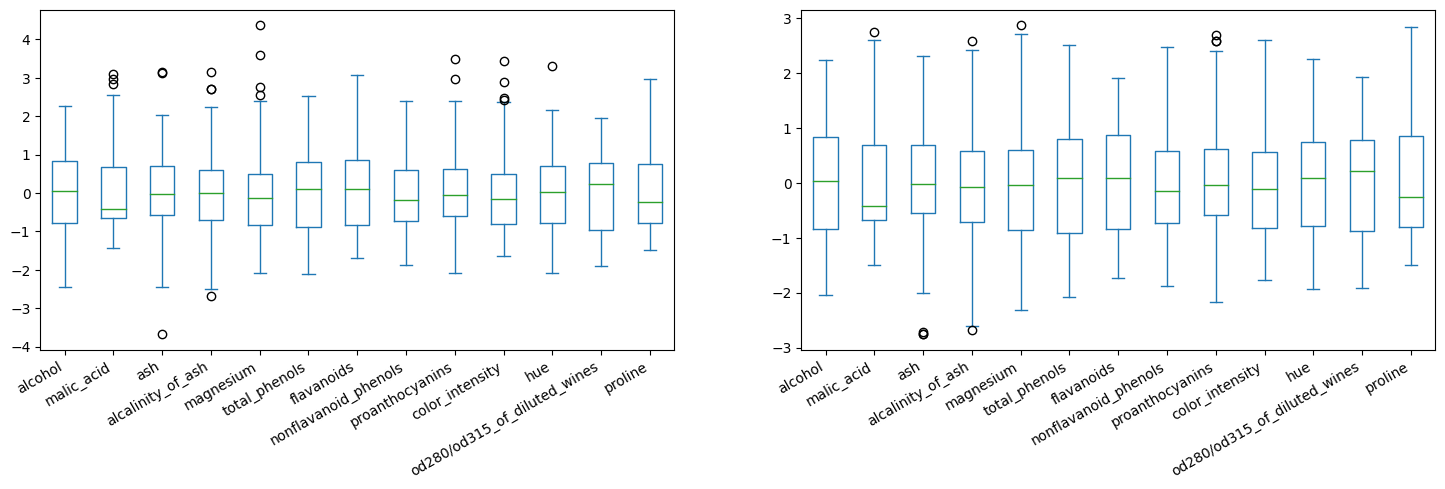

In [62]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

df_without_outliers = df[-df.apply(is_outlier).any(axis=1)]

fig, axes = plt.subplots(ncols=2, figsize=(18,5))


df.apply(scale).plot.box(ax=axes[0])
df_without_outliers.apply(scale).plot.box(ax=axes[1])

fig.autofmt_xdate(rotation=30, ha='right')

plt.show()

In [63]:
df_without_outliers.apply(is_outlier).sum()

alcohol                         0
malic_acid                      1
ash                             3
alcalinity_of_ash               2
magnesium                       1
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 3
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [64]:
def zscore_outlier(array):
  scaled_array = scale(array)
  return (scaled_array < -3) | (scaled_array > 3)

df_without_outliers = df[-df.apply(zscore_outlier).any(axis=1)]

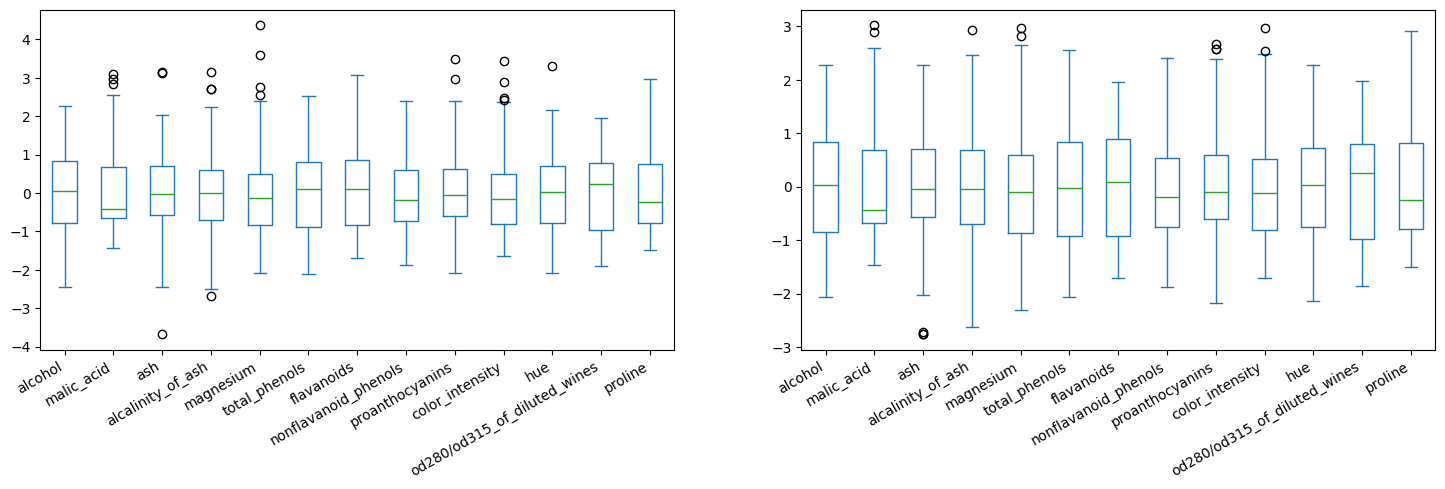

In [65]:
fig, axes = plt.subplots(ncols=2, figsize=(18,5))


df.apply(scale).plot.box(ax=axes[0])
df_without_outliers.apply(scale).plot.box(ax=axes[1])

fig.autofmt_xdate(rotation=30, ha='right')

plt.show()